<a href="https://www.kaggle.com/code/kappa1312/sales-insights-report?scriptVersionId=100332918" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/analyticity-round-2-data/Analyticity Round 2 Data.csv


In [2]:
df = pd.read_csv('../input/analyticity-round-2-data/Analyticity Round 2 Data.csv')
df.head()

,Order Date,Ship Date,Customer Name,State,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,01-01-2012,06-01-2012,Toby Braunhardt,Rajasthan,Office Supplies,Consumer,Storage,$408.30,2,0%,$106.14
1,01-01-2012,08-01-2012,Joseph Holt,Uttar Pradesh,Office Supplies,Consumer,Supplies,$120.37,3,10%,$36.04
2,01-01-2012,05-01-2012,Annie Thurman,Haryana,Office Supplies,Consumer,Storage,$66.12,4,0%,$29.64
3,01-01-2012,05-01-2012,Eugene Moren,Punjab,Office Supplies,Home Office,Paper,$44.87,3,50%,-$26.06
4,01-01-2012,08-01-2012,Joseph Holt,Uttar Pradesh,Furniture,Consumer,Furnishings,$113.67,5,10%,$37.77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Date     51290 non-null  object
 1   Ship Date      51290 non-null  object
 2   Customer Name  51290 non-null  object
 3   State          51290 non-null  object
 4   Category       51290 non-null  object
 5   Segment        51290 non-null  object
 6   Sub-Category   51290 non-null  object
 7   Sales          51290 non-null  object
 8   Quantity       51290 non-null  int64 
 9   Discount       51290 non-null  object
 10  Profit         51290 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [4]:
import datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [5]:
df.Sales = df.Sales.apply(lambda x: x.strip('$'))
df.Sales = df.Sales.apply(lambda x: x.replace(',','')).astype(float)

In [6]:
df.Discount = df.Discount.apply(lambda x: x.replace('%', '')).astype(float)
df.Discount = df.Discount/100

In [7]:
df.Profit = df.Profit.apply(lambda x: x.replace('$', ''))
df.Profit = df.Profit.apply(lambda x: x.replace(',', '')).astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     51290 non-null  datetime64[ns]
 1   Ship Date      51290 non-null  datetime64[ns]
 2   Customer Name  51290 non-null  object        
 3   State          51290 non-null  object        
 4   Category       51290 non-null  object        
 5   Segment        51290 non-null  object        
 6   Sub-Category   51290 non-null  object        
 7   Sales          51290 non-null  float64       
 8   Quantity       51290 non-null  int64         
 9   Discount       51290 non-null  float64       
 10  Profit         51290 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 4.3+ MB


In [9]:
df.isnull().sum()

Order Date       0
Ship Date        0
Customer Name    0
State            0
Category         0
Segment          0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
df.describe().round()

,Sales,Quantity,Discount,Profit
count,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0
std,488.0,2.0,0.0,174.0
min,0.0,1.0,0.0,-6600.0
25%,31.0,2.0,0.0,0.0
50%,85.0,3.0,0.0,9.0
75%,251.0,5.0,0.0,37.0
max,22638.0,14.0,1.0,8400.0


In [11]:
df['Ship Date'].max()

Timestamp('2016-07-01 00:00:00')

In [12]:
df['Order Date'].max()

Timestamp('2015-12-31 00:00:00')

In [13]:
Latest_Date = datetime.datetime(2016, 1, 1)

In [14]:
rfm = df.groupby('Customer Name').agg({'Order Date': lambda x: (Latest_Date - x.max()).days})

In [15]:
rfm.rename(columns = {'Order Date': 'Recency'}, inplace = True)

In [16]:
rfm['Frequency'] = df.groupby('Customer Name').agg({'Customer Name': lambda x: len(x)})

In [17]:
rfm['Sales'] = df.groupby('Customer Name').agg({'Sales': lambda x: x.sum()})

In [18]:
rfm.head()

,Recency,Frequency,Sales
Customer Name,,,
Aaron Bergman,17,89,24644.68
Aaron Hawkins,13,56,20759.53
Aaron Smayling,27,60,14212.62
Adam Bellavance,26,68,20186.80
Adam Hart,3,84,21718.24


In [19]:
rfm.Recency.describe()

count    796.000000
mean      27.148241
std       36.412875
min        1.000000
25%        7.000000
50%       17.000000
75%       36.000000
max      587.000000
Name: Recency, dtype: float64

In [20]:
rfm.Frequency.describe()

count    796.000000
mean      64.434673
std       13.563621
min        7.000000
25%       55.000000
50%       64.000000
75%       74.000000
max      108.000000
Name: Frequency, dtype: float64

In [21]:
rfm.Sales.head(15)

Customer Name
Aaron Bergman         24644.68
Aaron Hawkins         20759.53
Aaron Smayling        14212.62
Adam Bellavance       20186.80
Adam Hart             21718.24
Adam Shillingsburg    15444.66
Adrian Barton         25123.19
Adrian Hane           11405.94
Adrian Shami          11286.06
Aimee Bixby           16201.19
Alan Barnes           13049.05
Alan Dominguez        18539.76
Alan Haines           15279.73
Alan Hwang            23642.88
Alan Schoenberger     21836.41
Name: Sales, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

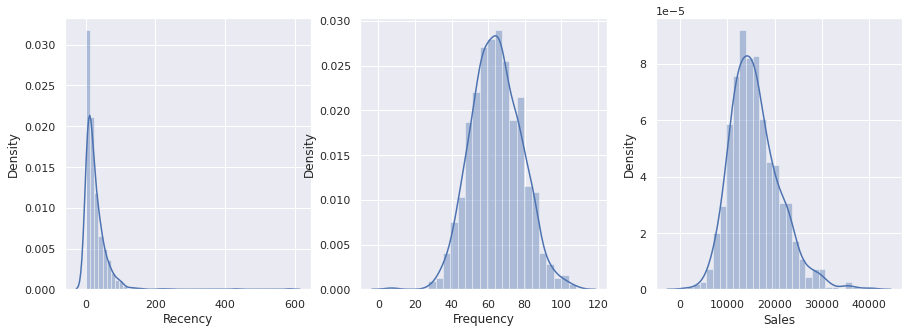

In [22]:
sns.set()
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1,3,1)
sns.distplot(rfm.query('Recency < 600')['Recency'])

plt.subplot(1,3,2)
sns.distplot(rfm['Frequency'])

plt.subplot(1,3,3)
sns.distplot(rfm['Sales'])
plt.show()

In [23]:
rfm["R"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])

rfm["F"] = pd.qcut(rfm["Frequency"],5,labels=[1,2,3,4,5])

rfm["M"] = pd.qcut(rfm["Sales"],5,labels=[1,2,3,4,5])

rfm["RFM_Score"] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm["Category"] = rfm["R"].astype("str")+rfm["F"].astype("str")
rfm.head()

,Recency,Frequency,Sales,R,F,M,RFM_Score,Category
Customer Name,,,,,,,,
Aaron Bergman,17,89,24644.68,3,5,5,13,35
Aaron Hawkins,13,56,20759.53,4,2,5,11,42
Aaron Smayling,27,60,14212.62,2,2,3,7,22
Adam Bellavance,26,68,20186.80,2,4,5,11,24
Adam Hart,3,84,21718.24,5,5,5,15,55


In [24]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': 'Cant loose them',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'[4-5][2-3]': 'Potential loyalists',
    r'51': 'New customers',
    r'5[4-5]': 'Champions'
}


rfm['Category'] = rfm['Category'].replace(seg_map, regex=True)


In [25]:
rfm.head(15)

,Recency,Frequency,Sales,R,F,M,RFM_Score,Category
Customer Name,,,,,,,,
Aaron Bergman,17,89,24644.68,3,5,5,13,Loyal customers
Aaron Hawkins,13,56,20759.53,4,2,5,11,Potential loyalists
Aaron Smayling,27,60,14212.62,2,2,3,7,Hibernating
Adam Bellavance,26,68,20186.80,2,4,5,11,At risk
Adam Hart,3,84,21718.24,5,5,5,15,Champions
Adam Shillingsburg,16,71,15444.66,3,4,3,10,Loyal customers
Adrian Barton,33,77,25123.19,2,5,5,12,Cant loose them
Adrian Hane,81,54,11405.94,1,2,1,4,Hibernating
Adrian Shami,42,44,11286.06,2,1,1,4,Hibernating


In [26]:
df.to_csv('Sales Report.csv', index=False)

In [27]:
rfm.to_csv('RFM.csv')